In [38]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [39]:
# Load dataset
df = pd.read_csv("Salary_Dataset.csv")

In [40]:
df.head()

,Years_Experience,Previous_Salary,Number_of_Languages,Education_Level,New_Salary
0,7,64754,2,Masters,46612.49627
1,20,41411,1,PhD,23428.99015
2,15,32911,5,Bachelors,27471.45839
3,11,97270,5,Bachelors,60595.58717
4,8,113763,1,Masters,67368.60130


In [41]:
df.describe()

,Years_Experience,Previous_Salary,Number_of_Languages,New_Salary
count,200.000000,200.00000,200.000000,200.000000
mean,9.860000,74233.67500,3.130000,46590.185283
std,5.815453,27063.59365,1.467607,15000.820569
min,1.000000,30301.00000,1.000000,16703.795700
25%,5.000000,49428.50000,2.000000,33956.142390
50%,9.000000,75964.00000,3.000000,46645.987145
75%,15.000000,98144.50000,4.250000,59365.463905
max,20.000000,119912.00000,5.000000,75950.482310


In [42]:
# Splitting dataset
X = df.drop(columns=["New_Salary"])
y = df["New_Salary"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Encoding categorical features
preprocessor = ColumnTransformer([
    ("education", OneHotEncoder(handle_unknown='ignore'), ["Education_Level"])
], remainder='passthrough')

In [44]:
# Trying polynomial degrees from 1 to 5
degrees = range(1, 6)
train_errors = []
val_errors = []

In [45]:
for d in degrees:
    poly = PolynomialFeatures(degree=d)  # Apply polynomial transformation separately
    model = make_pipeline(preprocessor, poly, LinearRegression())
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Compute MSE
    train_mse = mean_squared_error(y_train, y_train_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)
    
    train_errors.append(train_mse)
    val_errors.append(val_mse)

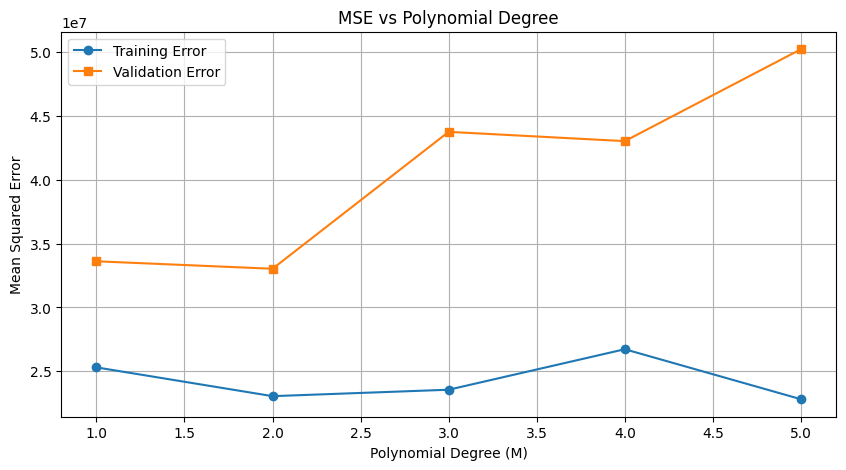

In [46]:
# Plot errors
plt.figure(figsize=(10, 5))
plt.plot(degrees, train_errors, label="Training Error", marker='o')
plt.plot(degrees, val_errors, label="Validation Error", marker='s')
plt.xlabel("Polynomial Degree (M)")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Polynomial Degree")
plt.legend()
plt.grid(True)
plt.show()

In [47]:
# Find optimal degree
optimal_degree = degrees[np.argmin(val_errors)]
print(f"Optimal Polynomial Degree: {optimal_degree}")

Optimal Polynomial Degree: 2


In [48]:
# Compare with Linear Regression
linear_model = make_pipeline(preprocessor, LinearRegression())
linear_model.fit(X_train, y_train)
y_linear_pred = linear_model.predict(X_val)
linear_mse = mean_squared_error(y_val, y_linear_pred)

In [49]:
# Best polynomial model
best_poly_model = make_pipeline(preprocessor, PolynomialFeatures(degree=optimal_degree), LinearRegression())
best_poly_model.fit(X_train, y_train)
y_poly_pred = best_poly_model.predict(X_val)
poly_mse = mean_squared_error(y_val, y_poly_pred)

print(f"Linear Regression MSE: {linear_mse}")
print(f"Best Polynomial Regression (Degree {optimal_degree}) MSE: {poly_mse}")

Linear Regression MSE: 33617884.542648934
Best Polynomial Regression (Degree 2) MSE: 33032035.228363376


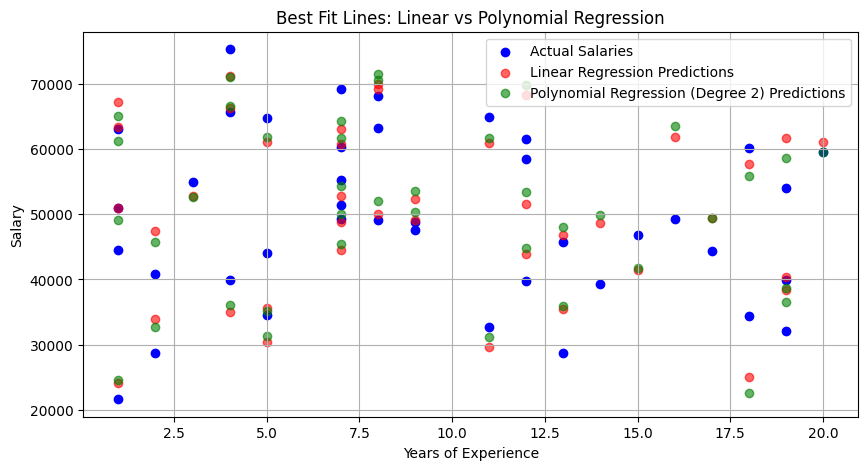

In [50]:
# Visualizing best fit lines
plt.figure(figsize=(10, 5))
plt.scatter(X_val["Years_Experience"], y_val, color='blue', label="Actual Salaries")
plt.scatter(X_val["Years_Experience"], y_linear_pred, color='red', label="Linear Regression Predictions", alpha=0.6)
plt.scatter(X_val["Years_Experience"], y_poly_pred, color='green', label=f"Polynomial Regression (Degree {optimal_degree}) Predictions", alpha=0.6)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Best Fit Lines: Linear vs Polynomial Regression")
plt.legend()
plt.grid(True)
plt.show()